In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
# read files
df = pd.read_csv("1632300362534233.csv")
df.head(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [63]:
df.shape

(3479, 8)

In [64]:
# drop wrong values
for value in df["Area"]:
    char = list(value)
    if len(char) >= 4:
       df = df.drop(df[df["Area"] == value].index)

In [65]:
df["Area"] =df["Area"].astype("int64")

In [66]:
df.dtypes

Area            int64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [67]:
df["Address"] = df["Address"].dropna()

In [68]:
df.describe()

,Area,Room,Price,Price(USD)
count,3473.000000,3473.000000,3.473000e+03,3.473000e+03
mean,106.774547,2.079758,5.354621e+09,1.784874e+05
std,69.365567,0.758764,8.104058e+09,2.701353e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.415000e+09,4.716667e+04
50%,90.000000,2.000000,2.880000e+09,9.600000e+04
75%,120.000000,2.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,9.240000e+10,3.080000e+06


Text(0, 0.5, 'Count')

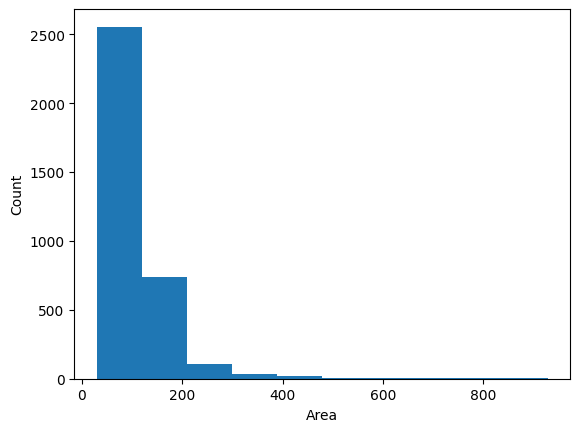

In [69]:
plt.hist(df[["Area"]])
plt.xlabel("Area")
plt.ylabel("Count")

{'whiskers': [<matplotlib.lines.Line2D at 0x13015e0f1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x13015e0f730>,
 'boxes': [<matplotlib.lines.Line2D at 0x13015e0ef50>],
 'medians': [<matplotlib.lines.Line2D at 0x13015e0fc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x13015e0ff10>],
 'means': []}

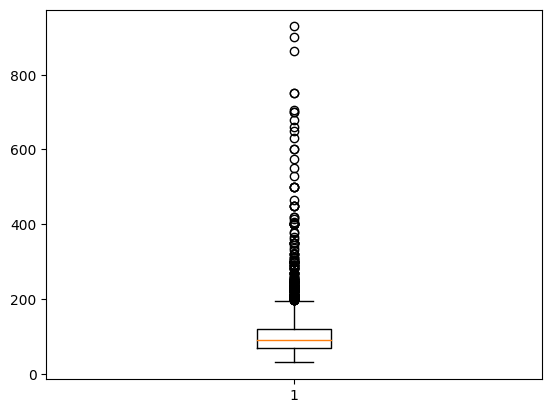

In [70]:
plt.boxplot(df[["Area"]])

In [71]:
# delete outliers
def outliers_(x):
    q1 = x.quantile(0.25)
    q2 = x.quantile(0.75)
    IQR = q2 - q1
    outlier = x[((x < (q1 - 1.5*IQR)) | (x > (q2 + 1.5*IQR)))]
    return outlier

outliers = outliers_(x=df["Area"])
print("number of outliers:" , len(outliers))
print("min:" ,min(outliers))
print("max:" ,max(outliers))
for value in set(outliers):
    df = df.drop(df[df["Area"] == value].index)

number of outliers: 238
min: 197
max: 929


In [72]:
df.describe()

,Area,Room,Price,Price(USD)
count,3235.000000,3235.000000,3.235000e+03,3.235000e+03
mean,93.177743,1.983308,3.902950e+09,1.300983e+05
std,33.701584,0.657740,3.859541e+09,1.286514e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,67.000000,2.000000,1.300000e+09,4.333333e+04
50%,87.000000,2.000000,2.600000e+09,8.666667e+04
75%,112.000000,2.000000,5.050000e+09,1.683333e+05
max,195.000000,5.000000,3.349000e+10,1.116333e+06


In [73]:
z = df[["Area" , "Price"]]
df[["Area" , "Room" , "Price" , "Parking" , "Warehouse" , "Elevator"]].corr()

,Area,Room,Price,Parking,Warehouse,Elevator
Area,1.000000,0.790019,0.730814,0.311507,0.171418,0.319825
Room,0.790019,1.000000,0.530618,0.277549,0.136200,0.268556
Price,0.730814,0.530618,1.000000,0.285706,0.170903,0.265680
Parking,0.311507,0.277549,0.285706,1.000000,0.418938,0.444177
Warehouse,0.171418,0.136200,0.170903,0.418938,1.000000,0.187407
Elevator,0.319825,0.268556,0.265680,0.444177,0.187407,1.000000


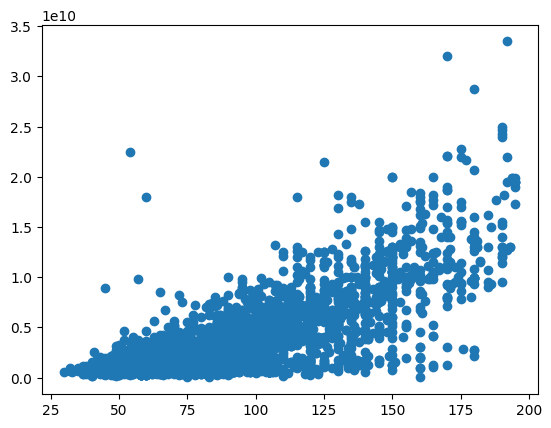

In [74]:
plt.scatter(df[["Area"]] , df[["Price"]])

<Axes: xlabel='Area', ylabel='Price(USD)'>

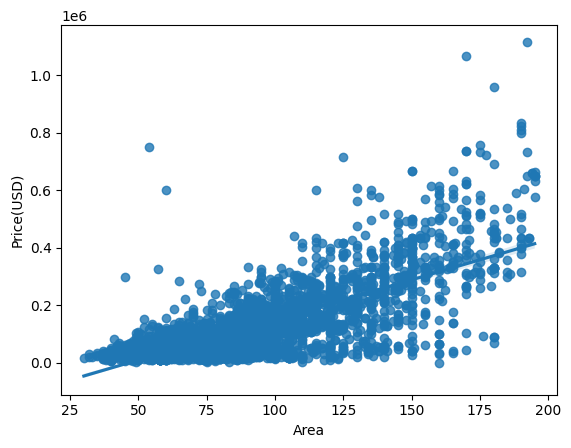

In [75]:
sns.regplot(df[["Area" , "Price"]] , x=df[["Area"]] , y=df[["Price(USD)"]])

In [76]:
msk = np.random.rand(len(df)) < 0.7
train = z[msk]
test = z[~msk]

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
train_x = np.asanyarray(train[["Area"]])
train_y = np.asanyarray(train[["Price"]])

test_x = np.asanyarray(test[["Area"]])
test_y = np.asanyarray(test[["Price"]])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.0000e+00, 6.3000e+01, 3.9690e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 1.2300e+02, 1.5129e+04],
       ...,
       [1.0000e+00, 6.3000e+01, 3.9690e+03],
       [1.0000e+00, 8.6000e+01, 7.3960e+03],
       [1.0000e+00, 1.0500e+02, 1.1025e+04]])

In [78]:
ml = LinearRegression()
train_y_ = ml.fit(train_x_poly , train_y)
print("coef:" , ml.coef_)
print("intercept: " , ml.intercept_)

coef: [[        0.         -45551539.25704863    606170.4773801 ]]
intercept:  [2.17247265e+09]


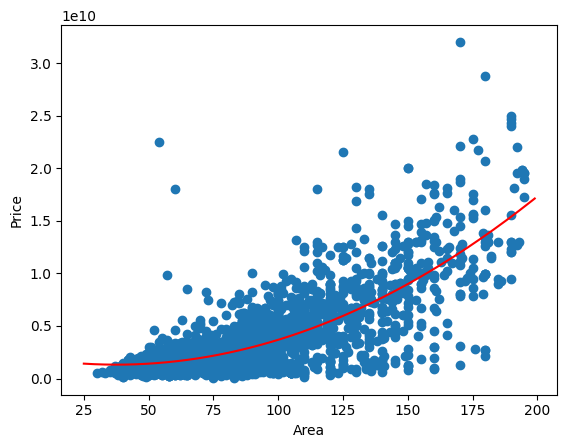

In [79]:
plt.scatter(train.Area , train.Price)
xx = np.arange(25 , 200 , 1)
yy = ml.intercept_[0] + ml.coef_[0][1] * xx + ml.coef_[0][2]*np.power(xx , 2)
plt.plot(xx , yy , "-r")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [83]:
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_ = ml.predict(test_x_poly)
print("mean absolute error: %0.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("mean squared error: %0.2f" % np.mean(np.absolute(test_y_ - test_y) **2 ))
print("r-squared: %0.2f" % r2_score(test_y , test_y_))

mean absolute error: 1633624473.26
mean squared error: 5638024416578957312.00
r-squared: 0.61
